In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
data = pd.read_csv("data/1429_1.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
data = data[['reviews.rating' , 'reviews.text']]
data=data.dropna()
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


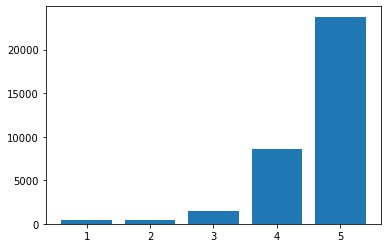

In [7]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

In [8]:
data2 = pd.read_csv("data/Consumer_Reviews_of_Amazon_Products_May19.csv", dtype={'user_id': int})
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]

data3 = pd.read_csv("data/Consumer_Reviews_of_Amazon_Products.csv", dtype={'user_id': int})
data3 = data3[['reviews.rating' , 'reviews.text']]
data3 = data3[data3["reviews.rating"]<=3]

frames = [data, data2, data3]
df = pd.concat(frames)
df = df.dropna()

## We have 3 classifications.

In [9]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

## Preprocessing the data

In [ ]:
df["reviews.text"]=df["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
df["reviews.text"]=df["reviews.text"].str.lower()
#tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

df['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
df['cleaned'].head()

In [ ]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df['cleaned']).toarray()
texts=pd.DataFrame(text)

In [ ]:
y=df["sentiment"].values
X=pd.DataFrame(texts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)

In [ ]:
print('Train accuracy :', (lr.score(X_train, y_train))*100)
print('Test accuracy :', (lr.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, lr.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, lr.predict(X_test)))

## Multinomial Naive Bayes¶

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

In [ ]:
print('Train accuracy :', (nb.score(X_train, y_train))*100)
print('Test accuracy :', (nb.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, nb.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, nb.predict(X_test)))

## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train,y_train)

In [ ]:
print('Train accuracy :', (dt.score(X_train, y_train))*100)
print('Test accuracy :', (dt.score(X_test, y_test))*100)
      
print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, dt.predict(X_test)))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, dt.predict(X_test)))

## Using RNN - Long Short Term Memory(LSTM)

In [13]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM, Bidirectional
from keras.layers import GlobalMaxPooling1D

In [14]:
token = Tokenizer()
token.fit_on_texts(df["reviews.text"])
word_index = token.word_index
max_len = 120
X_train, X_test, y_train, y_test = train_test_split(df["reviews.text"], df["sentiment"], test_size=0.25, random_state=42)

In [15]:
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding = "post",truncating = "post")

X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, padding = "post", truncating = "post")

y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

len(y_test),len(X_test),len(X_train),len(y_train)

(9432, 9432, 28295, 28295)

## Model

In [17]:
vocab_size = len(word_index)+1
embedding_dim = 16
optimizer = Adam(lr=0.0001, decay=0.0001)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim , input_length=max_len))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           244048    
_________________________________________________________________
lstm (LSTM)                  (None, 120, 150)          100200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 100)               15100     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 540,251
Trainable params: 540,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=16, epochs=8)

Epoch 1/8
1769/1769 [==============================] - 377s 209ms/step - loss: 0.3482 - accuracy: 0.8566
Epoch 2/8
1769/1769 [==============================] - 358s 203ms/step - loss: 0.2973 - accuracy: 0.8561
Epoch 3/8
1769/1769 [==============================] - 360s 204ms/step - loss: 0.2919 - accuracy: 0.8625
Epoch 4/8
1769/1769 [==============================] - 364s 206ms/step - loss: 0.2754 - accuracy: 0.8560
Epoch 5/8
1769/1769 [==============================] - 368s 208ms/step - loss: 0.2759 - accuracy: 0.8614
Epoch 6/8
1769/1769 [==============================] - 371s 210ms/step - loss: 0.2812 - accuracy: 0.8574
Epoch 7/8
1769/1769 [==============================] - 373s 211ms/step - loss: 0.2968 - accuracy: 0.8589
Epoch 8/8
1769/1769 [==============================] - 369s 208ms/step - loss: 0.2937 - accuracy: 0.8614


In [19]:
result = model.evaluate(X_train, y_train)
print( 'Train accuracy :' , result[1]*100)
result = model.evaluate(X_test,y_test)
print( 'Test accuracy :' , result[1]*100)

885/885 [==============================] - 71s 79ms/step - loss: 0.2981 - accuracy: 0.8577
Train accuracy : 85.76780557632446
295/295 [==============================] - 27s 92ms/step - loss: 0.3067 - accuracy: 0.8532
Test accuracy : 85.31594276428223


## Conclusion

We extracted the features of our dataset and built several supervised model based on that. These models not only include traditional algorithms such as naive bayes, logistic regression but also deep learning models such as Recurrent Neural Networks and Convolutional Neural networks.

From the results, our highest accuracy on the test set is 91.3% when using LSTM and  dropout.

One of the main reason the accuracy is not high enough is because of the data imbalance.